In [11]:
import distance as ds
import numpy as np
import matplotlib.pyplot as plt

In [12]:
t, lat, lon, alt, alt84, speed, direction, distance, sigma_horz_meters, sigma_alt_meters, satellites = np.loadtxt(
    '/workspaces/CP1-24-midterm/iglesias-cardinale/data/ic001_gps_circle_run001.csv' ,
    skiprows=1,
    delimiter = ',',
    unpack=True)

In [13]:
#Convert latitude and longitude from degrees to radians

lat_rad = lat*np.pi/180
lon_rad = lon*np.pi/180

In [14]:
#Calculate the x, y and z positions

x,y,z = ds.gps_wgs84(lat_rad, lon_rad, alt84)

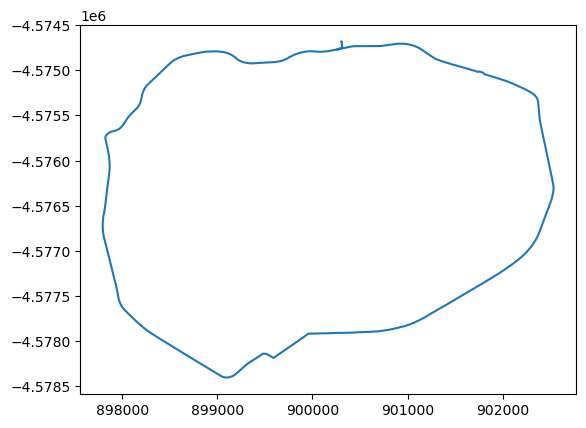

In [15]:
#Plot the data

plt.plot(x,y)